【Faster R-CNN】

【問題1】学習と推定

In [ ]:
cd /content/drive/MyDrive/ObjectDetection-master

/content/drive/MyDrive/ObjectDetection-master


In [2]:
!pip install keras==2.2.0

!pip install tensorflow==1.15

!pip install Keras-Applications==1.0.7

!pip install h5py==2.10.0



     |████████████████████████████████| 300 kB 7.5 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.0 which is incompatible.
tensorflow 2.6.0 requires keras-preprocessing~=1.1.2, but you have keras-preprocessing 1.0.1 which is incompatible.
     |████████████████████████████████| 412.3 MB 17 kB/s 
     |████████████████████████████████| 3.8 MB 58.6 MB/s 
     |████████████████████████████████| 42

学習を行う

In [ ]:
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20210904-064801_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

推定を行う

In [ ]:
#　動いたのが確認できたので途中で打ち切った
!python predict.py -i kaggle_simpson_testset/kaggle_simpson_testset -c ./save/train_20210904-064801_config.pickle

Using TensorFlow backend.










2021-09-04 07:55:50.221806: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-09-04 07:55:50.226229: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200145000 Hz
2021-09-04 07:55:50.226659: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c5c357bd40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-04 07:55:50.226701: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-04 07:55:50.228767: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-04 07:55:50.240018: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-04 07:55:50.240062: I tensorflow/stream_ex

【問題2】コードリーディング

●RoIプーリングを実現しているコードはどこか  
RoiPoolingConv.pyのファイルの中で、class RoiPoolingConv(Layer)として定義している

●Faster R-CNNについて  
モデルに関しては、faster_rcnn.pyのpyファイルの中で、ResNetをインポートしrnpとして扱い展開をしている

●学習について  
学習はtrain.pyのpyファイルの中で、def main()の中で展開されている  
(細かいところは理解が難しかった)

●予測について  
予測に関してはpredict.pyのpyファイルで、行われている。

●loss、accuracyについて  
train.pyの中で、losses、rpn_accuracy_rpn_monitor, rpn_accuracy_for_epochなどて定義している

【YOLOv3】

【問題3】学習済みの重みによる推定

モデル形式の変更

In [3]:
!pwd

/content


In [4]:
# keras-YOLOをクローン
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 1.23 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [5]:
#keras-YOLOに移動
%cd /content/keras-yolo3

/content/keras-yolo3


In [6]:
# yolov3weightのダウンロード（学習済みの重み）
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-09-05 06:36:41--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  75.6MB/s    in 3.3s    

2021-09-05 06:36:44 (70.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [7]:
#事前学習済みの重みをロード
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-09-05 06:36:53.165998: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-09-05 06:36:53.170989: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999995000 Hz
2021-09-05 06:36:53.171197: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564f0d3caa00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-05 06:36:53.171230: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-05 06:36:53.189824: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-05 06:36:53.248194:

In [8]:
!pwd
!mv "/content/test_image.jpg" "/content/keras-yolo3"

/content/keras-yolo3


In [9]:
#yoloを実行してみる
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2021-09-05 06:39:11.648096: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-09-05 06:39:11.653322: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999995000 Hz
2021-09-05 06:39:11.653557: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557e31bb8a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-05 06:39:11.653592: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-05 06:39:11.655499: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-05 06:39:11.667841: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: 

猫（cat）であることが検出できたようである

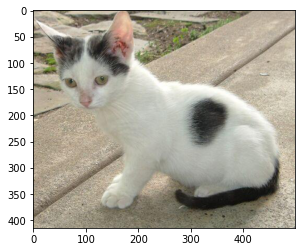

In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#input_image
im = Image.open("test_image.jpg")
#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

【問題4】学習のためのファイルを作成

In [13]:
#　まず前回使ったannotation.txtを取り込む
import pandas as pd 
annotation_df = pd.read_csv('/content/annotation.txt',header=None)

In [14]:
#確認
#この５の列をラベルに変更する必要がある
annotation_df.head()

,0,1,2,3,4,5
0,./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,abraham_grampa_simpson
1,./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,abraham_grampa_simpson
2,./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,abraham_grampa_simpson
3,./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,abraham_grampa_simpson
4,./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,abraham_grampa_simpson


In [16]:
# キャラクター名を数値（クラス・ラベル）に変更する
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
annotation_df.iloc[:,5] = le.fit_transform(annotation_df.iloc[:,5])
annotation_df.head()

,0,1,2,3,4,5
0,./characters/abraham_grampa_simpson/pic_0000.jpg,57,72,52,72,0
1,./characters/abraham_grampa_simpson/pic_0001.jpg,80,31,337,354,0
2,./characters/abraham_grampa_simpson/pic_0002.jpg,128,48,285,407,0
3,./characters/abraham_grampa_simpson/pic_0003.jpg,72,126,158,275,0
4,./characters/abraham_grampa_simpson/pic_0004.jpg,123,61,294,416,0


In [17]:
n_sample, n_col = annotation_df.shape

In [19]:
rcnn_path = '/content/annotation_rcnn.txt'
yolo_path = '/content/annotation.txt'

# rcnnの方のannotation.txtを開く
with open(rcnn_path) as f:
    # データを読み込む
    lines = f.readline() 
    # データ数（行数）でループ
    for i in range(n_sample):
        # カンマ区切りのデータをリストに変換
        split_line = lines.split(',') 
        # 画像のパスは一番前に格納されているので取得
        image_path = split_line[0]
        # パス変更
        split_line[0] = './' + image_path
        # 末尾をキャラクター名から数値（クラス・ラベル）に変更→改行コード加える
        split_line[-1] = str(annotation_df.iloc[i,5]) + '\n'  
        # yoloの方のannotation.txtを開き保存
        with open(yolo_path, mode='a') as out_f:
            join_line = ','.join(split_line)  
            join_line = join_line.replace('.jpg,','.jpg ')  
            out_f.write(join_line)

【問題5】学習が行えることの確認

train.py 17行目 annotation_path = 'train.txt'をannotation_path = 'annotation.txt'に変えて実行

In [24]:
# メモリ不足のせいか、学習が途中で止まってしまった
!python train.py

Using TensorFlow backend.








2021-09-05 07:34:03.277008: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-09-05 07:34:03.282361: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1999995000 Hz
2021-09-05 07:34:03.282598: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561862486bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-09-05 07:34:03.282634: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-09-05 07:34:03.284540: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-09-05 07:34:03.295951: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-09-05 07:34:03.296009: I tensorflow/str